In [1]:
import numpy as np
import pandas as pd
import os 
import statsmodels.api as sm
from plotnine import *
np.random.seed(12345)

### Problem 1

I. Sequence of Bernoulli trials (coin tosses): 0, 0, 1, 0, 0, 1, 1, 1, 0, 0.
Number of heads = 4. Total number of tosses = 10. So, my intuitive guess for p(heads) = 4/10 = 0.4

II. Likelihood function 

$L = П*p^k(1-p)^(1-k) = 0.4*(1-0.4)^9 = 0.4 * 0.6^9$

III. The graph of the likelihood function

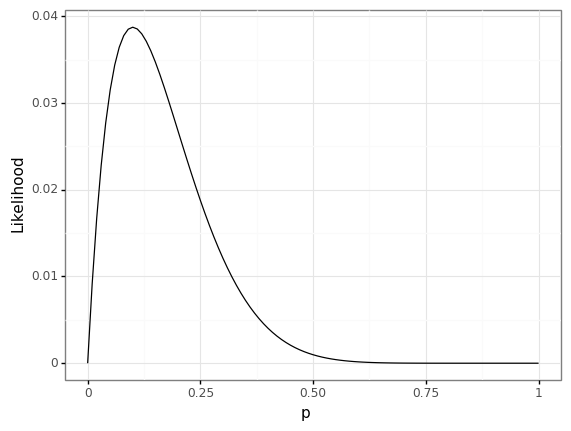

In [7]:
def likelihood_b(p):
    return p*(1-p)**9
#create the list of possible p parameters
p_alternatives = [x/100 for x in range(101)]
#compute the likelihood for each p
likelihood_values = [likelihood_b(x) for x in p_alternatives]
#plot corresponding likelihoods
data_plot = pd.DataFrame({'p_alts': p_alternatives,
                          'likelihood_vals': likelihood_values})
plot = (ggplot(data_plot, aes(x = 'p_alts'))+
        geom_line(aes(y = 'likelihood_vals'), linetype = 'solid', colour = 'black')+
        theme_bw()+
        ylab('Likelihood')+
        xlab('p'))
print(plot)

IV. Find the MLE of p

In [8]:
from scipy.optimize import minimize
def likelihood_b(p):
    return -p*(1-p)**9
optim = minimize(likelihood_b, x0 = 0, method = "nelder-mead")
print(optim)

 final_simplex: (array([[0.1      ],
       [0.1000625]]), array([-0.03874205, -0.03874204]))
           fun: -0.038742048899999985
       message: 'Optimization terminated successfully.'
          nfev: 36
           nit: 18
        status: 0
       success: True
             x: array([0.1])
